<a href="https://colab.research.google.com/github/DhruvDutta/DataScienceProjects/blob/main/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://drive.google.com/file/d/11cxz1j9AhanenSUPN6liqOTtLWlxjqbr/view?usp=sharing
!gdown --id 11cxz1j9AhanenSUPN6liqOTtLWlxjqbr

Downloading...
From: https://drive.google.com/uc?id=11cxz1j9AhanenSUPN6liqOTtLWlxjqbr
To: /content/test.csv
100% 51.1M/51.1M [00:00<00:00, 95.9MB/s]


In [2]:
# https://drive.google.com/file/d/1cP28AkkSk4N35pUs0x0M2pYJgUWRp_o-/view?usp=sharing
!gdown --id 1cP28AkkSk4N35pUs0x0M2pYJgUWRp_o-

Downloading...
From: https://drive.google.com/uc?id=1cP28AkkSk4N35pUs0x0M2pYJgUWRp_o-
To: /content/train.csv
100% 76.8M/76.8M [00:00<00:00, 125MB/s]


In [3]:
import pandas as pd
training_data= pd.read_csv('/content/train.csv')
testing_data=pd.read_csv('/content/test.csv')

training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
testing_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import numpy as np
testing_data = testing_data.fillna(0)

In [6]:
Xtrain = np.array(training_data[training_data.keys()[1:]])
ytrain = np.array(training_data[training_data.keys()[0]])
Xtest = np.array(testing_data)

In [7]:
Xtrain.shape,ytrain.shape,testing_data.shape

((42000, 784), (42000,), (28000, 784))

In [8]:
Xtrain=Xtrain/Xtrain.max()
Xtest=Xtest/Xtest.max()

Xtrain.max(),Xtest.max()

(1.0, 1.0)

#Plot Random Images

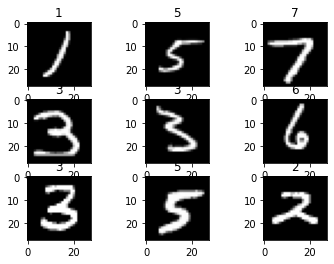

In [9]:
import numpy as np, matplotlib.pyplot as plt 
indexes=np.random.randint(0,high=Xtrain.shape[0],size=9)

for i in range(len(indexes)):
  plt.subplot(3,3,i+1)
  plt.imshow(Xtrain[indexes[i]].reshape(28,28),cmap='gray')
  plt.title(ytrain[indexes[i]])

In [10]:
Xtest[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

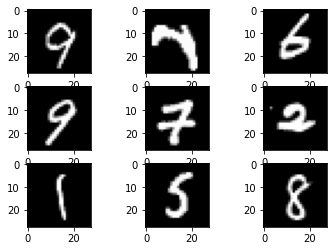

In [11]:
import matplotlib.pyplot as plt 
indexes_=np.random.randint(0,high=Xtest.shape[0],size=9)

for i in range(len(indexes_)):
  plt.subplot(3,3,i+1)
  plt.imshow(Xtest[indexes_[i]].reshape(28,28),cmap='gray')
  

#Early Stopper

In [12]:
import tensorflow as tf

In [13]:
earlyStopper=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)

In [46]:
import tensorflow as tf
model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(4,(3,3),input_shape=(28,28,1)))

model.add(tf.keras.layers.Conv2D(8,(3,3),activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))

model.add(tf.keras.layers.Dense(10))

In [47]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 4)         40        
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 8)         296       
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               2359808   
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2,365,274
Trainable params: 2,365,274
Non-trainable params: 0
_________________________________________________________________


In [49]:
history=model.fit(Xtrain.reshape(-1,28,28,1),ytrain,verbose=1,epochs=20,callbacks=[earlyStopper],validation_split=0.2)

Epoch 1/20
1050/1050 [==============================] - 8s 7ms/step - loss: 0.1808 - accuracy: 0.9478 - val_loss: 0.0762 - val_accuracy: 0.9756
Epoch 2/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0522 - accuracy: 0.9842 - val_loss: 0.0663 - val_accuracy: 0.9808
Epoch 3/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.0709 - val_accuracy: 0.9798
Epoch 4/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0662 - val_accuracy: 0.9814
Epoch 5/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.0739 - val_accuracy: 0.9812
Epoch 6/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0862 - val_accuracy: 0.9805
Epoch 7/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0072 - accuracy: 0.9973 - val_loss: 0.0884 - val_accuracy:

#plot predictions

In [56]:
model.predict(Xtest[0].reshape(-1,28,28,1)).argmax()

CPU times: user 86.5 ms, sys: 11.1 ms, total: 97.6 ms
Wall time: 107 ms


2

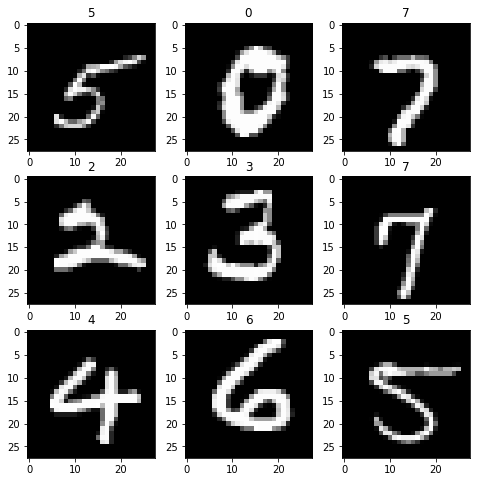

In [51]:
import matplotlib.pyplot as plt 
indexes_=np.random.randint(0,high=Xtest.shape[0],size=9)
plt.figure(figsize=(8,8))
for i in range(len(indexes_)):
  plt.subplot(3,3,i+1)
  plt.imshow(Xtest[indexes_[i]].reshape(28,28),cmap='gray')
  plt.title(model.predict(Xtest[indexes_[i]].reshape(-1,28,28,1)).argmax())

In [52]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://6b418aa3-eb06-4c3e-8287-a2fd16453468/assets


In [53]:
# load saved model
with open('finalized_model.pkl' , 'rb') as f:
    lr = pickle.load(f)

In [54]:
model.save('model')
lr.predict(Xtest[0].reshape(-1,28,28,1)).argmax()

INFO:tensorflow:Assets written to: model/assets


2

In [55]:
!zip -r 'model' 'model'

updating: model/ (stored 0%)
updating: model/variables/ (stored 0%)
updating: model/variables/variables.index (deflated 64%)
updating: model/variables/variables.data-00000-of-00001 (deflated 7%)
updating: model/saved_model.pb (deflated 87%)
updating: model/assets/ (stored 0%)
updating: model/keras_metadata.pb (deflated 89%)
